# Movie Recommender System - Data Preparation and Exploration

### Content of this notebook

1. Preparation and cleaning of the dataset
2. Feature engineering
3. Exploration of the data

*For the preparation of the recommender systems, please see the notebook named 'Creation_Recommender_Systems'*

## 1. Preparation and cleaning of the dataset

Importing the libraries used in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import unidecode
import re
import pickle

Loading the different data files into Pandas dataframes.

In [2]:
movies = pd.read_csv('data/movies_metadata.csv')
credits = pd.read_csv('data/credits.csv')
keywords = pd.read_csv('data/keywords.csv')
links = pd.read_csv('data/links_small.csv')
ratings = pd.read_csv('data/ratings_small.csv')

C:\Users\Wendy\Anaconda3\envs\NLP\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



Taking a first look at the movies dataframe.

In [3]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


To avoid confusion, I will rename the column 'id' from the movies dataframe to 'tmdb_id' to clarify the type of id.

In [4]:
movies.rename(columns={'id':'tmdb_id'}, inplace=True)

The dataset consists of 45,466 movies and 24 features. Below I explore the different columns and their datatypes.

In [5]:
movies.shape

(45466, 24)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   tmdb_id                45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

There are a few columns with incorrect datatypes. Below I will correct the columns that were incorrectly classified as 'object'. To be able to change the datatype of the 'tmdb_id' column, I first have to delete a few rows with a date instead of an id in the 'tmdb_id' column.

In [7]:
movies = movies.drop(movies[(movies.tmdb_id.isin(['1997-08-20', '2012-09-29','2014-01-01']))].index)

In [8]:
movies['tmdb_id'] = movies.tmdb_id.astype('int')
movies['popularity'] = movies.popularity.astype('float')
movies['budget'] = movies.budget.astype('float')

I will check the amount of missing data. For now I am not going to do anything with the missing data, because I will first merge this dataframe with some other dataframes.

In [9]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
tmdb_id                      0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25051
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64

Taking a first look at the credits dataframe.

In [10]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


To avoid confusion, I will rename the column 'id' from the movies dataframe to 'tmdb_id' to clarify the type of id.

In [11]:
credits.rename(columns={'id':'tmdb_id'}, inplace=True)

The credits dataframe consists of 45,476 rows (movies) and 3 columns. There are no missing values.

In [12]:
credits.shape

(45476, 3)

In [13]:
credits.isnull().sum()

cast       0
crew       0
tmdb_id    0
dtype: int64

Taking a first look at the keywords dataframe.

In [14]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


To avoid confusion, I will rename the column 'id' from the movies dataframe to 'tmdb_id' to clarify the type of id.

In [15]:
keywords.rename(columns={'id':'tmdb_id'}, inplace=True)

The keywords dataframe consists of 46,419 rows (movies) and 2 columns. There are no missing values.

In [16]:
keywords.shape

(46419, 2)

In [17]:
keywords.isnull().sum()

tmdb_id     0
keywords    0
dtype: int64

Taking a first look at the links dataframe.

In [18]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


The links dataframe consists of 9,125 rows (movies) and 3 columns. The links dataframe is a smaller subset of the full data set. Due to computational limits, I have decided to work with a reduced dataset. There are 13 missing values for the columns 'tmdbId'.

In [19]:
links.shape

(9125, 3)

In [20]:
links.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

Taking a first look at the ratings dataframe.

In [21]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


The ratings dataframe consists of 100,004 rows (ratings) and 4 columns. The ratings dataframe is a smaller subset of the full data set. Due to computational limits, I have decided to work with a reduced dataset. There are no missing values.

In [22]:
ratings.shape

(100004, 4)

In [23]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Identifying the amount of unique users and movies in the ratings dataframe.

In [24]:
print('Amount of unique users:', ratings.userId.nunique())
print('Amount of unique movies:', ratings.movieId.nunique())

Amount of unique users: 671
Amount of unique movies: 9066


I will remove the timestamp column, because I do not need it in this project.

In [69]:
ratings = ratings.drop(columns=['timestamp'])

Based on the ratings dataframe, I will create a new dataframe with the average rating per movie and the count of ratings per movie.

In [25]:
average_ratings = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
average_ratings['rating_count'] = pd.Series(ratings.groupby('movieId')['userId'].nunique())

In [26]:
average_ratings.shape

(9066, 2)

In [27]:
average_ratings.head()

,rating,rating_count
movieId,,
1,3.872470,247
2,3.401869,107
3,3.161017,59
4,2.384615,13
5,3.267857,56


Combining the dataframes "movies", "credits", "keywords", "links" and "average_ratings".

In [28]:
df = movies.merge(credits, how='left', on='tmdb_id')
df = df.merge(keywords, how='left', on='tmdb_id')
df = df.merge(links, how='left', left_on='tmdb_id', right_on='tmdbId')
df = df.drop(columns='tmdbId')
df = df.merge(average_ratings, how='left', on='movieId')

I will delete some columns that I won't need for the purpose of this project, or that had a very large amount of missing data.

In [29]:
df = df.drop(columns=['adult','belongs_to_collection', 'homepage', 'poster_path', 'tagline', 'video'], axis=1)

This leaves me with a dataframe of 46,629 rows (movies) and 25 columns.

In [30]:
df.shape

(46629, 25)

In [31]:
df.isnull().sum()

budget                      0
genres                      0
tmdb_id                     0
imdb_id                    17
original_language          11
original_title              0
overview                  995
popularity                  4
production_companies        4
production_countries        4
release_date               88
revenue                     4
runtime                   268
spoken_languages            4
status                     86
title                       4
vote_average                4
vote_count                  4
cast                        1
crew                        1
keywords                    1
movieId                 37410
imdbId                  37410
rating                  37467
rating_count            37467
dtype: int64

**Reduction of the original dataset**
<br>
<br>
There are a lot of missing values in the last 4 columns. This is because I have decided to work with a reduced dataset (due to computational limitations of my laptop). For this project I will only use a subset of 100,004 ratings of 671 users on 9066 movies. I will reduce the dataset into a new dataframe that only includes this smaller subset of movies and remove any duplicates. This leaves me with a dataframe with 9,025 rows (movies) and 25 columns.

In [32]:
df_small = df.dropna(subset=['rating'])
df_small = df_small.drop_duplicates(subset=['movieId'])

In [33]:
df_small.shape

(9025, 25)

In [34]:
df_small.isnull().sum()

budget                   0
genres                   0
tmdb_id                  0
imdb_id                  0
original_language        0
original_title           0
overview                12
popularity               0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   2
title                    0
vote_average             0
vote_count               0
cast                     0
crew                     0
keywords                 0
movieId                  0
imdbId                   0
rating                   0
rating_count             0
dtype: int64

In the final dataset, there are only a few rows with missing data. Since the number of missing data is so small, I have decided to simply remove these few lines from the dataset.

In [35]:
df_small = df_small.dropna(how='any')
df_small = df_small.reset_index()
df_small.rename(columns={'index':'index_original'}, inplace=True)

## 2. Feature engineering

In order to make movie recommendations, it is very important to have a good metric to rank the movies. I could just use the average rating/vote per movie, but this would have some drawbacks. First, if I use the average rating I do not take into account the popularity of the movie. Second, when a movie has few ratings/votes, its average is not reliable and will not be a good representation. As the number of ratings/votes increases, the ratings normalize and the average rating will better reflect the quality of the movie.

Therefore, I decided to use IMDB's weighted rating formula:

### Weighted Rating = $(\frac{v}{v + m}\cdot R) + (\frac{m}{v + m}\cdot C)$

Where:
- *v* is the number of votes obtained by the movie
- *m* is the minimum number of votes required for the movie to be recommended
- R is the average rating of the movie
- C is the average rating of all movies in the dataset

To calculate the weighted rating I use the *vote_average* and *vote_count* columns (and not the *rating* and *rating_count* columns), because the vote metric has more reviews than the rating metric.

As *m* I use the number of votes in the 75th percentile. This means that to be considered in the ranking, the movie must have more votes than at least 75% of the movies in our dataset.

In [36]:
v = df_small.vote_count
m = df_small.vote_count.quantile(0.75)
R = df_small.vote_average
C = df_small.vote_average.mean()

df_small['weighted_vote_average'] = ((v/(v+m))*R)+((m/(v+m))*C)

Creating a column with the year of the launch.

In [37]:
df_small['release_year'] = df_small['release_date'].apply(lambda x: x[0:4])

Creating a column with the genres of the movies in a list (a movie can have multiple genres).

In [38]:
df_small['genres_list'] = df_small['genres'].apply(ast.literal_eval)
df_small['genres_list'] = df_small['genres_list'].apply(lambda x: [i['name'] for i in x])

Creating a column with a the name of the actors in a list.

In [39]:
df_small['cast_list'] = df_small['cast'].apply(ast.literal_eval)
df_small['cast_list'] = df_small['cast_list'].apply(lambda x: [i['name'] for i in x])

Creating a column with a list of the 3 main actors of each movie.

In [40]:
df_small['cast_top3'] = df_small['cast'].apply(ast.literal_eval)
df_small['cast_top3'] = df_small['cast_top3'].apply(lambda x: [i['name'] for i in x if i['order']<3])

Creating a column with the director(s) of a movie in a list.

In [41]:
df_small['director_list'] = df_small['crew'].apply(ast.literal_eval)
df_small['director_list'] = df_small['director_list'].apply(lambda x: [i['name'] for i in x if i['job'] == 'Director'])

Creating a column with the production companies of each movie in a list.

In [42]:
df_small['prodcompany_list'] = df_small['production_companies'].apply(ast.literal_eval)
df_small['prodcompany_list'] = df_small['prodcompany_list'].apply(lambda x: [i['name'] for i in x])

Creating a column with the production countries of each movie in a list.

In [43]:
df_small['prodcountry_list'] = df_small['production_countries'].apply(ast.literal_eval)
df_small['prodcountry_list'] = df_small['prodcountry_list'].apply(lambda x: [i['name'] for i in x])

Creating a column with the keywords of each movie in a list.

In [44]:
df_small['keywords_list'] = df_small['keywords'].apply(ast.literal_eval)
df_small['keywords_list'] = df_small['keywords_list'].apply(lambda x: [i['name'] for i in x])

There are a few movies with the same name. In this case I will add the release year to the title to distinguish them. After I will remove any remaining movies that are duplicated.

In [45]:
df_small.loc[df_small.title.duplicated(keep=False),'title'] = df_small.title.str.cat(df_small.release_year, sep=' ')
df_small = df_small.drop_duplicates(subset=['title'], keep='first').reset_index()

I now have a dataframe with 9010 rows and 36 columns.

In [46]:
df_small.shape

(9010, 36)

In [47]:
df_small.columns

Index(['index', 'index_original', 'budget', 'genres', 'tmdb_id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords', 'movieId',
       'imdbId', 'rating', 'rating_count', 'weighted_vote_average',
       'release_year', 'genres_list', 'cast_list', 'cast_top3',
       'director_list', 'prodcompany_list', 'prodcountry_list',
       'keywords_list'],
      dtype='object')

I will save the final dataframe as a pickle.

In [70]:
with open('pickles/df_small.pkl', 'wb') as f_df:
    pickle.dump(df_small, f_df)
    
with open('pickles/ratings.pkl', 'wb') as f_df:
    pickle.dump(ratings, f_df)

## 3. Exploration of the data

The table below shows that there are a lot of rows with zeros in the 'revenue' and 'budget' columns. Even though there are no 'missing values', the revenue and budget data seems very uncomplete. However, for the purpose of this project, I will not be needing these columns.
<br>
<br>
The columns 'popularity', 'runtime', 'vote_count' and 'rating_count' have some very high values. I believe that these high values are realistic. In the movie industry it is quite normal to have a few movies that become a lot more successful than others.

In [48]:
df_small[['popularity', 'revenue', 'budget', 'runtime', 'vote_average', 'vote_count', 'rating', 'rating_count']]\
                                                                                                    .describe().round(2)

,popularity,revenue,budget,runtime,vote_average,vote_count,rating,rating_count
count,9010.00,9.010000e+03,9.010000e+03,9010.00,9010.00,9010.00,9010.00,9010.00
mean,7.29,4.951991e+07,1.675493e+07,105.69,6.36,441.44,3.29,11.08
std,9.40,1.306348e+08,3.355841e+07,30.26,1.03,999.33,0.88,24.11
min,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.50,1.00
25%,2.97,0.000000e+00,0.000000e+00,93.00,5.80,29.00,2.83,1.00
50%,6.45,3.007560e+05,1.275000e+05,102.00,6.50,97.00,3.50,3.00
75%,9.88,3.697790e+07,2.000000e+07,115.00,7.00,368.00,3.96,9.00
max,547.49,2.787965e+09,3.800000e+08,1140.00,10.00,14075.00,5.00,341.00


The movies with the highest weighted ratings.

In [49]:
df_small.sort_values('weighted_vote_average', ascending=False).loc[:,['title','weighted_vote_average']].head(10)

,title,weighted_vote_average
283,The Shawshank Redemption,8.409895
688,The Godfather,8.376994
6866,The Dark Knight,8.243606
2363,Fight Club,8.229061
266,Pulp Fiction,8.221149
471,Schindler's List,8.151654
8541,Whiplash,8.149777
4213,Spirited Away,8.135642
1829,Life Is Beautiful,8.122324
320,Forrest Gump,8.120628


#### The distribution of the columns *rating*, *vote_average*, *popularity*, and *weighted_vote_average*.

Although the metrics 'rating' and 'vote_average' have a different scale, their distributions have a somewhat similar shape. The metric 'vote_average' contains a lot more reviews than the metric 'rating' and therefore has a smoother curve. The column 'rating' seems to have more strongly negative and strongly positive reviews than the 'vote_average' column. This might be due to the difference in scale (people might be less likely to give a 10 on a scale of 10, than to give a 5 on a scale of 5).
<br>
<br>
The metric 'popularity' has a very different distribution, strongly skewed to the right. It seems that almost all of the movies in the dataset have a popularity ranging from 0 to 30, with a few exceptions that became a lot more popular than the other movies.
<br>
<br>
The 'weighted vote average' column seems to be centered around 6.4, just like the 'vote average' column. However the 'weighted vote average' column is more normally distributed than the 'vote average' column and has less extreme values.

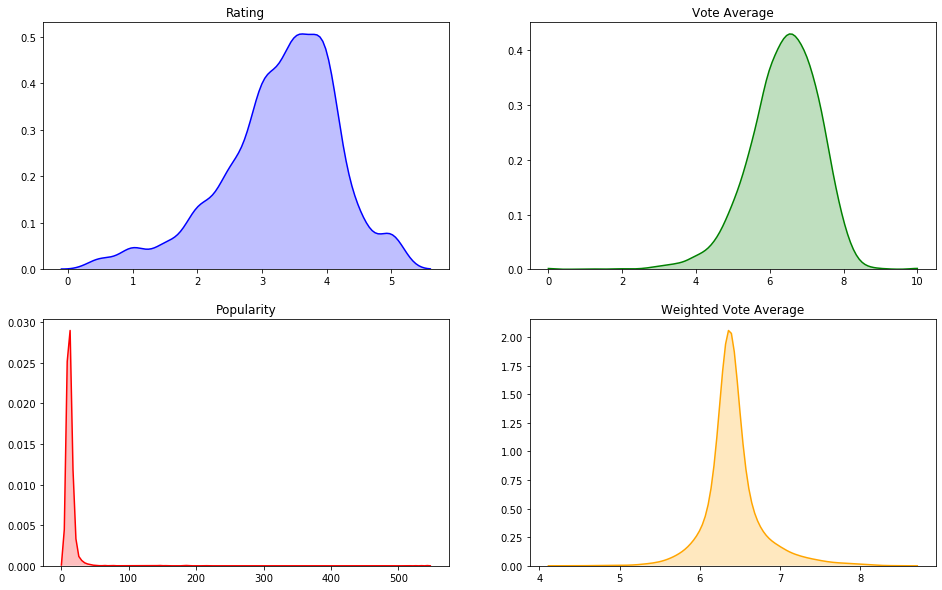

In [50]:
f, axes = plt.subplots(2, 2, figsize=(16,10))

ax1 = plt.subplot(221)
sns.kdeplot(df_small.rating, shade=True, color='b', ax=ax1, bw=0.2, legend=False)
plt.title('Rating')

ax2 = plt.subplot(222)
sns.kdeplot(df_small.vote_average, shade=True, color='g', ax=ax2, bw=0.2, cut=0, legend=False)
plt.title('Vote Average')

ax3 = plt.subplot(223)
sns.kdeplot(df_small.popularity, shade=True, color='r', ax=ax3, bw=3, cut=0, legend=False)
plt.title('Popularity')

ax4 = plt.subplot(224)
sns.kdeplot(df_small.weighted_vote_average, shade=True, color='orange', ax=ax4, bw=0.1, legend=False)
plt.title('Weighted Vote Average')

plt.show()

I will create 4 functions that help me plot some figures based on the features in lists, for example the genres, cast and keywords.

In [51]:
def get_unique_categories(series):
    '''Takes a series with lists of categories and returns a list with the unique categories'''
    s=set()
    for i in series:
        for x in i:
            s.add(x)
    return list(s)

def category_indices(series):
    '''Takes a series with lists of categories and returns a dictionary with pairs of categories and lists containing
    indeces of the movies within that category.'''
    dic = {}
    for index, item in enumerate(series):
        for x in item:
            dic.setdefault(x,[])
            dic[x].append(index)
    return dic

def count_movies_in_category(series):
    '''Takes a series with lists of categories and returns a dictionary with the amount of movies in each category,
    sorted from the category with the largest amount of movies to the category with the smallest amount of movies.'''
    dic = {k:len(v) for (k,v) in category_indices(series).items()}
    dic = dict(sorted(dic.items(), key=lambda x: x[1], reverse=True))
    return dic

def expand_multi_feature(df, column):
    '''Returns a dataframe where each row is a unique combination of a movie and a category.'''
    categories = category_indices(df[column])
    df_expand = pd.DataFrame()
    for category, indices in categories.items():
        rows = df.iloc[indices].copy()
        rows[column] = category
        df_expand = df_expand.append(rows)
    return df_expand

In [67]:
genres = get_unique_categories(df_small.genres_list)

with open('pickles/genres.pkl', 'wb') as f_genres:
    pickle.dump(genres, f_genres)

In [64]:
df_expand_genres = expand_multi_feature(df_small, 'genres_list')

with open('pickles/df_expand_genres.pkl', 'wb') as f_dfgenres:
    pickle.dump(df_expand_genres, f_dfgenres)

The amount of movies per genre.

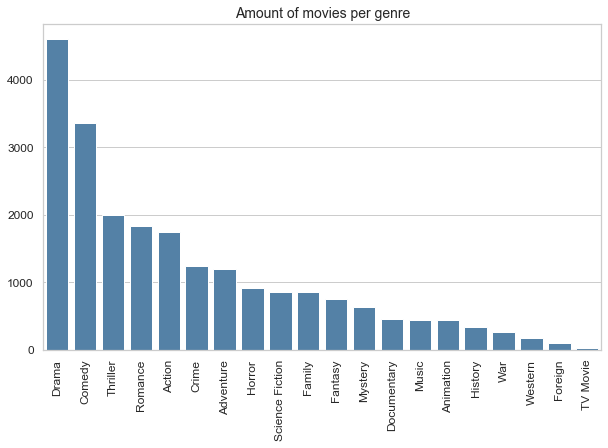

In [52]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Amount of movies per genre', fontsize=14)
sns.barplot(list(count_movies_in_category(df_small.genres_list).keys()), 
            list(count_movies_in_category(df_small.genres_list).values()), color='steelblue')
plt.show()

Weighted vote average per genre. There do not seem to be any significant differences in the weighted vote average among different genres.

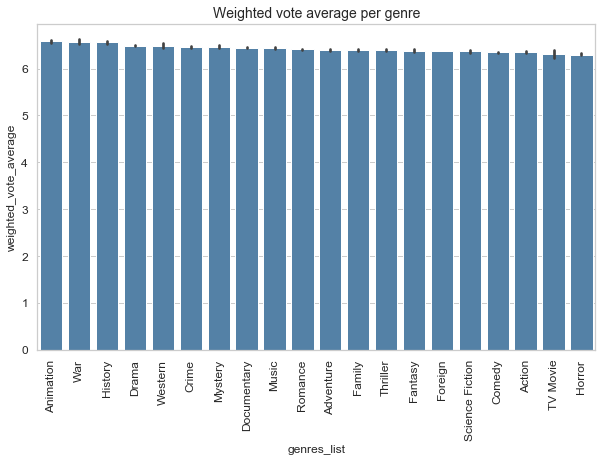

In [53]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Weighted vote average per genre', fontsize=14)
sns.barplot(df_expand_genres.genres_list, df_expand_genres.weighted_vote_average, color='steelblue', orient='v',\
           order=['Animation', 'War', 'History', 'Drama', 'Western', 'Crime', 'Mystery',
                  'Documentary', 'Music', 'Romance', 'Adventure', 'Family', 'Thriller',
                  'Fantasy', 'Foreign', 'Science Fiction', 'Comedy', 'Action', 'TV Movie',
                  'Horror'])
plt.show()

Popularity per genre. There are strong differences in movie popularity among the different genres. *Adventure* and *animation* are the most popular genres (the average popularity of animation movies has a large confidence interval though, suggesting that there is quite some variation in popularity within this genre). *Foreign movies* and *documentaries* are the least popular genres.

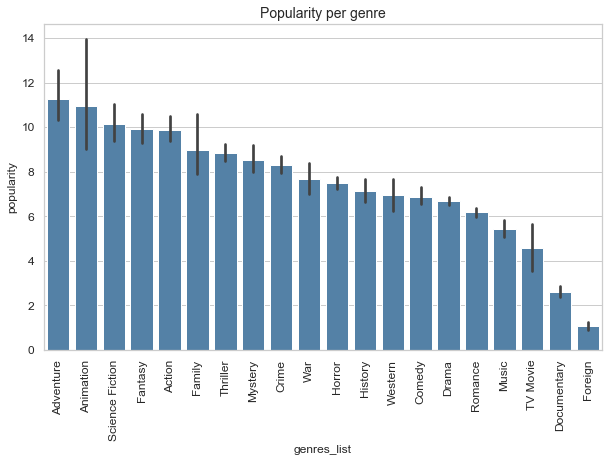

In [54]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6))
plt.xlabel('Popularity', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Popularity per genre', fontsize=14)
sns.barplot(x=df_expand_genres.genres_list, y=df_expand_genres.popularity, color='steelblue', orient='v',\
            order=['Adventure', 'Animation', 'Science Fiction', 'Fantasy', 'Action',
                  'Family', 'Thriller', 'Mystery', 'Crime', 'War', 'Horror', 'History',
                  'Western', 'Comedy', 'Drama', 'Romance', 'Music', 'TV Movie',
                  'Documentary', 'Foreign'])
plt.show()

The 20 most common actors.

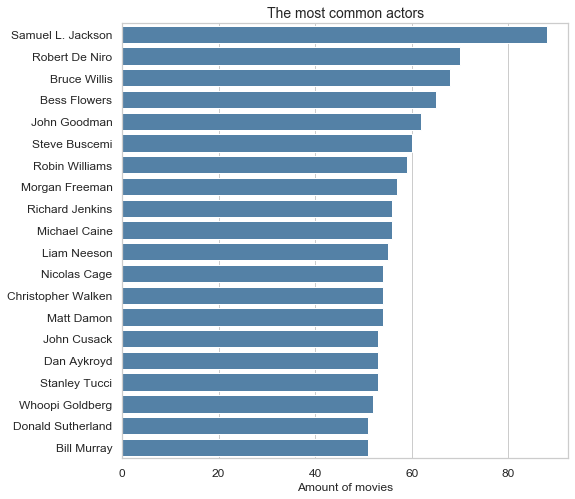

In [55]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 8))
plt.xlabel('Amount of movies', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('The most common actors', fontsize=14)
sns.barplot(list(count_movies_in_category(df_small.cast_list).values())[:20], 
            list(count_movies_in_category(df_small.cast_list).keys())[:20], color='steelblue', orient='h')
plt.show()

The 20 most common directors.

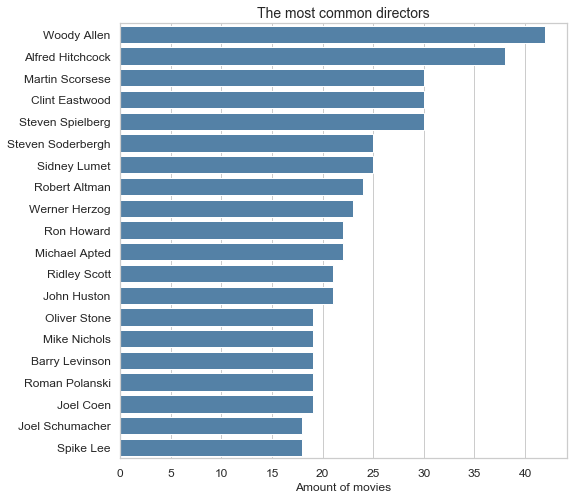

In [56]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 8))
plt.xlabel('Amount of movies', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('The most common directors', fontsize=14)
sns.barplot(list(count_movies_in_category(df_small.director_list).values())[:20], 
            list(count_movies_in_category(df_small.director_list).keys())[:20], color='steelblue', orient='h')
plt.show()

The 20 most common keywords.

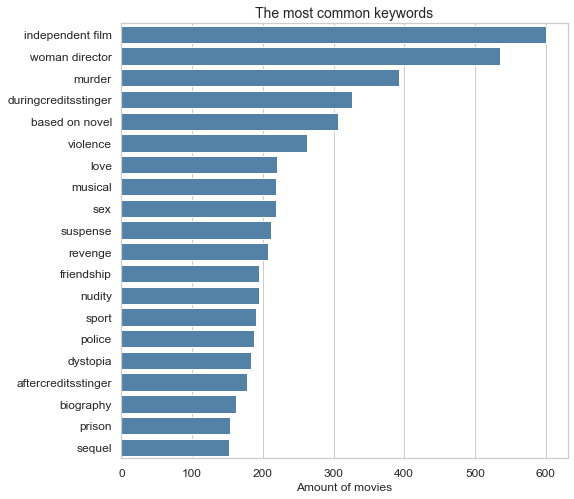

In [57]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 8))
plt.xlabel('Amount of movies', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('The most common keywords', fontsize=14)
sns.barplot(list(count_movies_in_category(df_small.keywords_list).values())[:20], 
            list(count_movies_in_category(df_small.keywords_list).keys())[:20], color='steelblue', orient='h')
plt.show()

The 20 most common production companies.

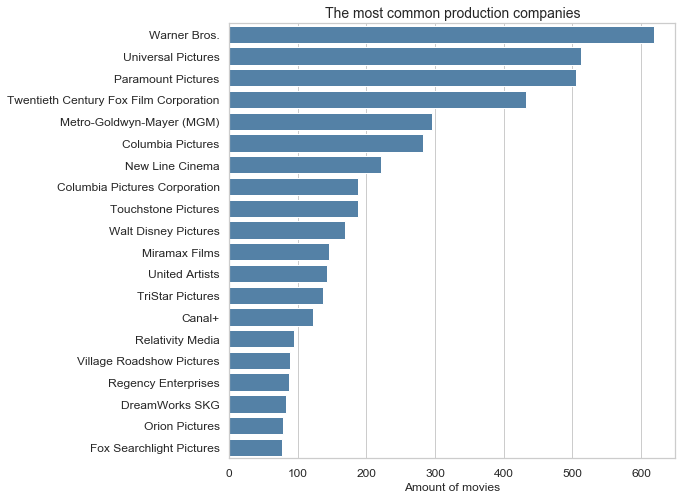

In [58]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 8))
plt.xlabel('Amount of movies', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('The most common production companies', fontsize=14)
sns.barplot(list(count_movies_in_category(df_small.prodcompany_list).values())[:20], 
            list(count_movies_in_category(df_small.prodcompany_list).keys())[:20], color='steelblue', orient='h')
plt.show()

The 10 most common original languages. The mayority of the movies (87,61%) is originally English spoken.

In [59]:
languages = pd.DataFrame(df_small.original_language.value_counts())
languages.columns= ['Amount of movies']
languages['percentage'] = (languages['Amount of movies']/len(df_small)*100).round(2)
languages.head(10)

,Amount of movies,percentage
en,7894,87.61
fr,270,3.00
ja,183,2.03
de,111,1.23
it,98,1.09
es,85,0.94
cn,47,0.52
sv,40,0.44
zh,38,0.42
ko,30,0.33


The 10 most common production countries. The US is by far the most common country to produce movies.

In [60]:
pd.DataFrame(count_movies_in_category(df_small.prodcountry_list).values(),
             index=count_movies_in_category(df_small.prodcountry_list).keys(),
             columns=['Amount of movies']).head(10)

,Amount of movies
United States of America,6804
United Kingdom,1199
France,693
Germany,534
Canada,356
Japan,284
Italy,258
Australia,163
Spain,122
Hong Kong,96
